# Look at where the animal are during and around non-singing

## import modules

In [1]:
import os
import yaml
import numpy as np
import scipy.io
import scipy.signal
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## constants

In [2]:
SAVE_FIG = False
SAVE_FIG_FORMAT = "pdf"
SAVE_FIG_DIR = "/home/csk/Documents/Research/Modeling singing mouse behavior/plots/concat"
NOTES_FILEPATH = "/mnt/labNAS/Chris/mousesong/usv_calls/08_solosocial/02_20230919_um008_uf003_mf/02_social/process_audio/all_notes/concat_all_notes_corrected_features_temporal.csv"
COMMON_WORLD_COORDS_FILEPATH = "/mnt/labNAS/Chris/mousesong/usv_calls/08_solosocial/02_20230919_um008_uf003_mf/02_social/process_video/2023-09-20-100934_cam0_00000_to_00004.concat_common_coords.mat"
L_COORDS_FILEPATH = "/mnt/labNAS/Chris/mousesong/usv_calls/08_solosocial/cam_params/cage_coords_21415940_corrected.yml"
R_COORDS_FILEPATH = "/mnt/labNAS/Chris/mousesong/usv_calls/08_solosocial/cam_params/cage_coords_21428187_corrected.yml"
COLOR_LEFT_MOUSE = "tab:blue"
COLOR_RIGHT_MOUSE = "tab:orange"

## load tracking file and skeleton

In [3]:
# load world coords
locations_world = scipy.io.loadmat(COMMON_WORLD_COORDS_FILEPATH, squeeze_me=True)
l_locations_world = locations_world["l_locations_world"]
r_locations_world = locations_world["r_locations_world"]
fps = 50

In [4]:
with open(L_COORDS_FILEPATH, "r") as f:
    l_coords = yaml.safe_load(f)
l_coords_world = l_coords["world_cage"]
with open(R_COORDS_FILEPATH, "r") as f:
    r_coords = yaml.safe_load(f)
r_coords_world = r_coords["world_cage"]

In [5]:
skeleton = np.array([[2, 0], [2, 1], [0, 1], [2, 3], [3, 4], [4, 5]])

## load song detections

In [6]:
df = pd.read_csv(NOTES_FILEPATH, usecols=["start", "end", "code", "type_amplitude"])
filtered_df = df[(df["code"] != 6) & (df["type_amplitude"] == "non-song")]
non_song_detections = list(filtered_df.itertuples(index=False, name=None))

In [7]:
spineM_idx = 4
l_spineM_world = l_locations_world[:, spineM_idx, :]
r_spineM_world = r_locations_world[:, spineM_idx, :]

## plot non-song position

In [8]:
t_before = 10
t_after = 0

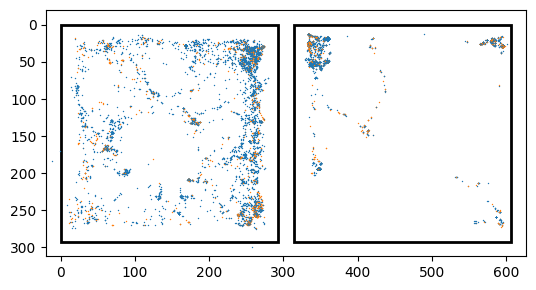

In [9]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.add_patch(
    patches.Rectangle(
        (l_coords_world["x"], l_coords_world["y"]),
        l_coords_world["w"],
        l_coords_world["h"],
        linewidth=2,
        edgecolor="k",
        facecolor="none",
    )
)
ax.add_patch(
    patches.Rectangle(
        (r_coords_world["x"], r_coords_world["y"]),
        r_coords_world["w"],
        r_coords_world["h"],
        linewidth=2,
        edgecolor="k",
        facecolor="none",
    )
)
ax.invert_yaxis()
ax.set_xlim([-20, 627])
ax.set_ylim([312, -20])
ax.set_aspect("equal", adjustable="box")
for i_non_song, non_song in enumerate(non_song_detections):
    t_non_song_start = non_song[0]
    t_non_song_stop = non_song[1]
    song_origin = non_song[2]
    s_non_song_start = int((t_non_song_start - t_before) * fps)
    s_non_song_stop = int((t_non_song_stop + t_after) * fps)
    if s_non_song_start < 0 or s_non_song_stop > l_spineM_world.shape[0]:
        print(f"Vocalization {i_non_song} does not have enough margin")
        continue
    if song_origin == 0:
        color = COLOR_LEFT_MOUSE
    else:
        color = COLOR_RIGHT_MOUSE
    non_song_start_loc_left = l_spineM_world[int(t_non_song_start * fps), :]
    non_song_start_loc_right = r_spineM_world[int(t_non_song_start * fps), :]
    ax.scatter(non_song_start_loc_left[0], non_song_start_loc_left[1], linewidths=0, color=color, s=1, zorder=2)
    ax.scatter(non_song_start_loc_right[0], non_song_start_loc_right[1], linewidths=0, color=color, s=1, zorder=2)
plt.tight_layout()
if SAVE_FIG:
    filename = f"5h__position_non_song.{SAVE_FIG_FORMAT}"
    file = os.path.join(SAVE_FIG_DIR, filename)
    plt.savefig(file, format=SAVE_FIG_FORMAT)
plt.show()